<a href="https://colab.research.google.com/github/bichpham102/analyticsCaseStudies/blob/main/chat_with_your_data_using_PandasAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTRUCTIONS

##To run codes in this file, you will need an OpenAI API Key.

## **WARNING**

> Note your Usage, you may be charge if you use up the free quota.







## How To Get an OpenAI API key

1. Sign Up for an OpenAI account [here](https://platform.openai.com/signup/) if you don't already have one.
2. Then you can go [here](https://platform.openai.com/api-keys) to create/access your API key. The API key will only be shown to you ONCE so do copy it out.
3. On the left of your screen (inside Google Colab), click the Key icon. Then `Add new secret` with (a) `Name` as OPENAI_API_KEY, (b) `Value` as the previously copied API key and (c) Turn on  `Notebook access`.



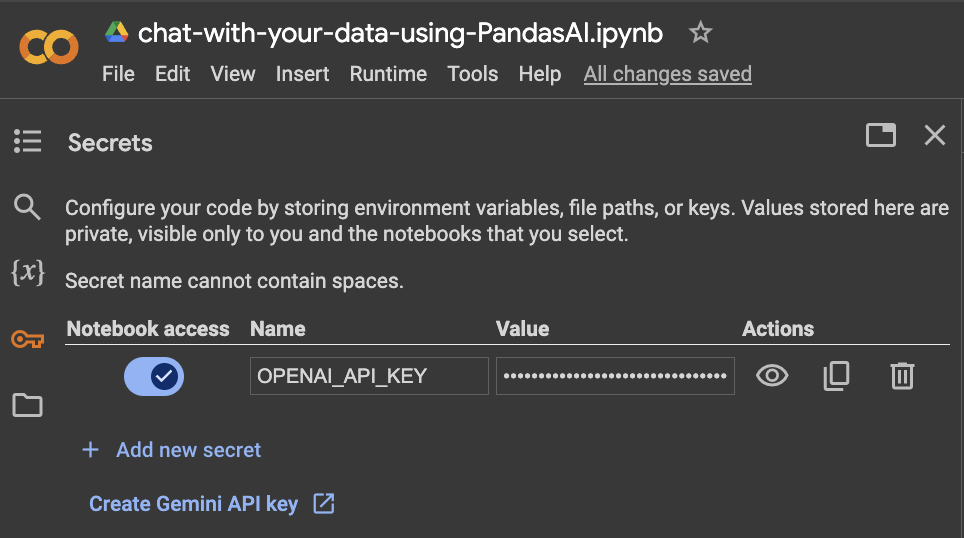


# 1. Import data into a SmartDataframe

In [1]:
# install package Pandas AI
!pip install pandasai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.8/179.8 kB 889.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.5/334.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: sqlglot
    Found existing insta

In [1]:
# set the OPENAI_API_KEY environment variable
from google.colab import userdata
api_key = userdata.get('OPENAI_API_KEY')

In [2]:
from pandasai import SmartDataframe
from pandasai.llm import OpenAI

# instantiate the OpenAI object
llm = OpenAI(api_token = api_key)
sdf = SmartDataframe('sample_data/california_housing_test.csv', config={"llm": llm}) # the csv is provided by default in Google Colab



To import other popular file types:


**Excel File**
```
sdf = SmartDataframe('file_name.xlsx')
```

**Google Sheet**
```
sdf = SmartDataframe("https://docs.google.com/spreadsheets/d/fake/edit#gid=0")
```


**Pandas DataFrame**
```
sdf = SmartDataframe(df)
```



If you have a different file type, you can refer to [Pandas AI documentation](https://docs.pandas-ai.com/examples) to import it.

# 2. Chat with the SmartDataframe to query code/result




### Example 1: Get the names of all columns

In [3]:
# Get answer
question = '''List out the columns' names'''
response = sdf.chat(question)
response

"The columns' names are: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value."

### Example 2: Which houses are in the top 5 most expensive houses?



In [4]:
# Get answer
question = '''Which houses are in the top 5 most expensive houses?'''
response = sdf.chat(question)
response

     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
42     -118.06     34.15                37.0       1980.0           226.0   
117    -122.07     37.34                30.0       1851.0           238.0   
118    -117.18     33.02                15.0       3540.0           453.0   
128    -122.47     37.79                52.0       2844.0           623.0   
135    -122.34     37.56                39.0       3562.0           391.0   

     population  households  median_income  median_house_value  
42        697.0       226.0        15.0001            500001.0  
117       631.0       236.0        10.1007            500001.0  
118      1364.0       425.0        13.6623            500001.0  
128      1380.0       596.0         4.7500            500001.0  
135      1139.0       391.0        12.6417            500001.0  


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
42,-118.06,34.15,37.0,1980.0,226.0,697.0,226.0,15.0001,500001.0
117,-122.07,37.34,30.0,1851.0,238.0,631.0,236.0,10.1007,500001.0
118,-117.18,33.02,15.0,3540.0,453.0,1364.0,425.0,13.6623,500001.0
128,-122.47,37.79,52.0,2844.0,623.0,1380.0,596.0,4.7500,500001.0
135,-122.34,37.56,39.0,3562.0,391.0,1139.0,391.0,12.6417,500001.0


In [5]:
# Get the code used to generate the code
print(sdf.last_code_generated)

data = {'longitude': [-120.89, -122.07, -120.45], 'latitude': [33.9, 38.96, 34.47], 'housing_median_age': [41.0, 38.0, 7.0], 'total_rooms': [1191.0, 2958.0, 312.0], 'total_bedrooms': [707.0, 109.0, 1281.0], 'population': [87.0, 667.0, 551.0], 'households': [915.0, 493.0, 888.0], 'median_income': [1.3403, 4.8488, 4.7179], 'median_house_value': [218800.0, 246100.0, 123900.0]}
df = pd.concat(dfs, ignore_index=True)
top_5_expensive_houses = df.nlargest(5, 'median_house_value')
result = {'type': 'dataframe', 'value': top_5_expensive_houses}
print(result['value'])


### Let's try it out!

In [6]:
# ask any question about sdf SmartDataframe
question = input('''Please type in your question: ''')
response = sdf.chat(question)
response

Please type in your question: what are the top 5 most expensive houses?
{'type': 'dataframe', 'value':      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
42     -118.06     34.15                37.0       1980.0           226.0   
117    -122.07     37.34                30.0       1851.0           238.0   
118    -117.18     33.02                15.0       3540.0           453.0   
128    -122.47     37.79                52.0       2844.0           623.0   
135    -122.34     37.56                39.0       3562.0           391.0   

     population  households  median_income  median_house_value  
42        697.0       226.0        15.0001            500001.0  
117       631.0       236.0        10.1007            500001.0  
118      1364.0       425.0        13.6623            500001.0  
128      1380.0       596.0         4.7500            500001.0  
135      1139.0       391.0        12.6417            500001.0  }


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
42,-118.06,34.15,37.0,1980.0,226.0,697.0,226.0,15.0001,500001.0
117,-122.07,37.34,30.0,1851.0,238.0,631.0,236.0,10.1007,500001.0
118,-117.18,33.02,15.0,3540.0,453.0,1364.0,425.0,13.6623,500001.0
128,-122.47,37.79,52.0,2844.0,623.0,1380.0,596.0,4.7500,500001.0
135,-122.34,37.56,39.0,3562.0,391.0,1139.0,391.0,12.6417,500001.0


In [7]:
# Get the code used to generate the code
print(sdf.last_code_generated)

data = {'longitude': [-120.89, -122.07, -120.45], 'latitude': [33.9, 38.96, 34.47], 'housing_median_age': [41.0, 38.0, 7.0], 'total_rooms': [1191.0, 2958.0, 312.0], 'total_bedrooms': [707.0, 109.0, 1281.0], 'population': [87.0, 667.0, 551.0], 'households': [915.0, 493.0, 888.0], 'median_income': [1.3403, 4.8488, 4.7179], 'median_house_value': [218800.0, 246100.0, 123900.0]}
df = pd.concat(dfs)
top_5_expensive_houses = df.nlargest(5, 'median_house_value')
result = {'type': 'dataframe', 'value': top_5_expensive_houses}
print(result)


# 3. Chat with the SmartDataframe to generate charts

### Example 3: Plot a histogram of median_house_value

In [8]:
from IPython.display import Image

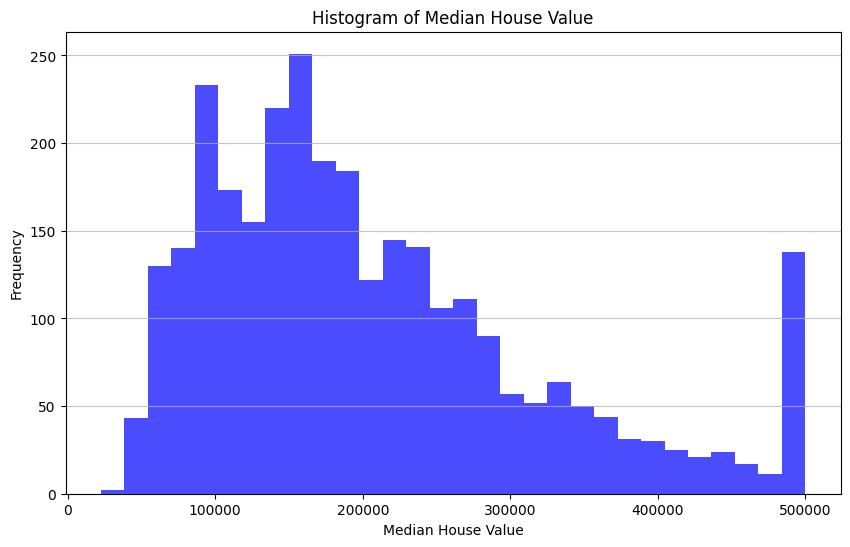

In [9]:
img_response = sdf.chat('''Plot a histogram of median_house_value''')

In [10]:
sdf.chat('''What can you say about the distribution of median_house_value?''')

'The distribution of median_house_value is approximately normal with a mean of 205846.27, a median of 177650.00, and a standard deviation of 113119.69.'

### Example 4: Make a scatter plot of median_house_value and median_income.

'/content/exports/charts/temp_chart.png'

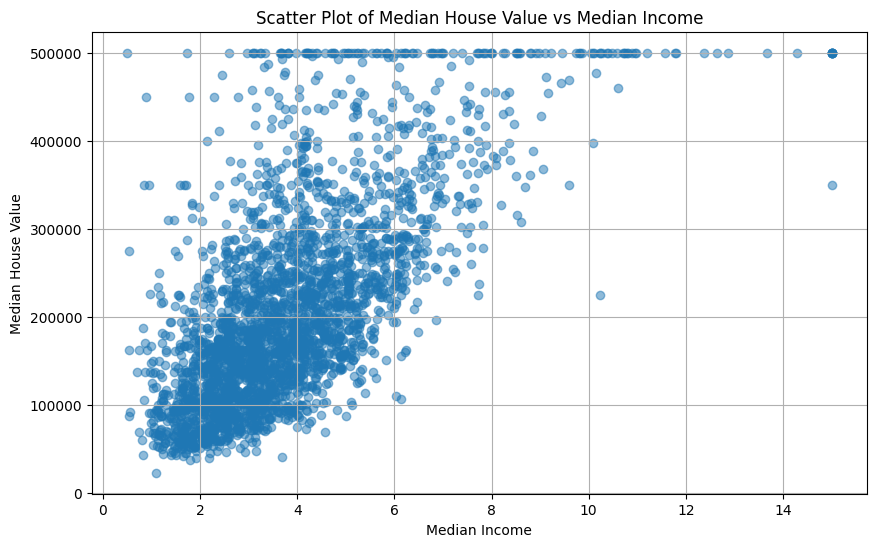

In [11]:
sdf.chat('''Make a scatter plot of median_house_value and median_income.''')

In [12]:
sdf.chat('''How is the correlation between median_house_value and median_income? Interpret it''')

'The correlation coefficient is 0.67. There is a positive correlation between median house value and median income, indicating that as income increases, house values tend to increase.'